In [6]:
import numpy as np

class Perceptron(object):
    '''퍼셉트론 분류기
    
    매개변수
    ------------
    eta : float
      학습률(0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : Id-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류
    
    '''

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        -------------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 데이터

        w_ : 학습된 가중치를 저장하는 배열
        errors_ : 각 에포크(epoch)마다 누적된 분류 오류를 저장하는 리스트

        반환값
        -------
        self : object
        
        """
        """랜덤 가중치 초기화
        rgen : 가중치 초기화를 위한 난수 생성기
        self.w_ : 가중치 벡터로, 평균이 0이고 표준편차가 0.01인 정규분포를 따르는 난수로 초기화
        size = 1 + X.shape는 편향(bias)향을 포함하기 위해 1을 더한 것이다.
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])

        # 각 에포크마다 누적된 분류 오류를 저장하는 리스트이다.
        self.errors_ = []

        # 반복하여 모델을 학습
        # 각 샘플 xi와 타깃 값 target에 대해 예측값과 실제 값의 차이를 계산하여 가중치를 업데이트
        # update가 0이 아니면 오류로 간주하고 errors를 증가시킴.
        # 각 에포크가 끝날 때마다 errors를 self.errors_에 추가한다.
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                # update는 학습률 eta와 예측 오류의 곱이다다
                update = self.eta * (target - self.predict(xi))
                # 가중치 self.w_는 update 값에 따라 조정된다.
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    # 입력 데이터(X)에 대한 순입력을 계산
    # 매개변수: X(입력 데이터, shape = [n_sameples, n_features])
    # 반환값 : 순입력 값, 즉 가중치와 입력 데이터의 내적에 편향(bias)를 더한 값
    def net_input(self, X):
        "입력 계산"
        # 입력 데이터와 가중치 벡터의 내적을 계산한다. 가중치 벡터에서 첫 번째 요소(편향)를 제외한 부분이다.
        # self.w_[1:]는 가중치 벡터에서 첫번째 요소(편향)을 제외한 부분이다. self.w_[0]는 편향(bias)
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # 입력 데이터 X에 대한 예측 값을 반환
    # 매개변수: X(입력 데이터, shape = [n_sameples, n_features])
    # 반환값: 예측된 클래스 레이블, 1 또는 -1
    # 순입력이 0이상이면 1을 반환하고 그렇지 안흥면 -1을 반환
    def predict(self, X):
        """ 단위 계산 함수를 사용하여 클래스 레이블을 반환합니다"""
        # 단위 계단 함수를 구현
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    


In [7]:
import pandas as pd

# URL을 문자열로 직접 생성
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print("URL: ", url)

# 데이터프레임을 URL에서 읽어오기
df = pd.read_csv(url, header=None, encoding='utf-8')
df.tail()

URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


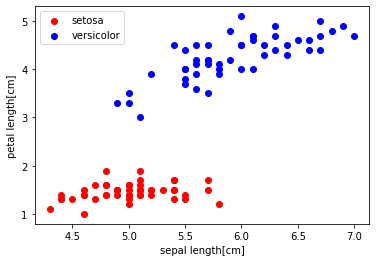

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택한다.
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출한다.
X = df.iloc[0:100, [0,2]].values

# 산점도를 그린다.
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o',  label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='o', label='versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()

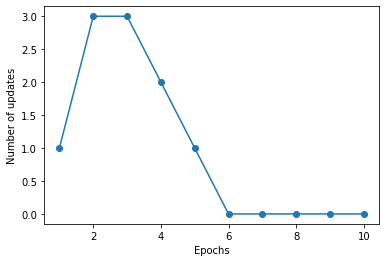

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_18048/2661509711.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


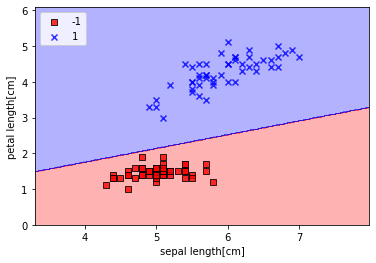

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정한다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그린다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그린다.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')
        

plot_decision_regions(X, y, classifier=ppn)    
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()        
    
